In [1]:
pip install fastparquet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 5.2 MB/s 
     |████████████████████████████████| 2.0 MB 38.8 MB/s 


In [2]:
##importing required modules
import pandas as pd
from fastparquet import ParquetFile

In [3]:
##connecting to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_parquet(r'/content/drive/MyDrive/DNN_PROJECT/yellow_tripdata_2020-01.parquet')
df.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,None
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,None


In [5]:
print(len(df["VendorID"])) ##checking the length of the attribute

6405008


In [6]:
##seperating date from datetime for further analysis
temp = []
for i in range(len(df["tpep_pickup_datetime"])):
  temp.append(str(df["tpep_pickup_datetime"][i]).split(" ")[0])
df["pickup_date"] = temp
df.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,None,2020-01-01
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,None,2020-01-01


In [7]:
df2 = pd.read_csv(r'/content/drive/MyDrive/DNN_PROJECT/export.csv')
df2.head(2)

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2020-01-01,3.6,1.7,5.0,NaN,NaN,NaN,17.3,NaN,1008.2,NaN
1,2020-01-02,4.7,0.6,8.9,NaN,NaN,NaN,12.4,NaN,1013.9,NaN


In [8]:
print(df2.loc[0])
print(df.loc[0])

date    2020-01-01
tavg           3.6
tmin           1.7
tmax           5.0
prcp           NaN
snow           NaN
wdir           NaN
wspd          17.3
wpgt           NaN
pres        1008.2
tsun           NaN
Name: 0, dtype: object
VendorID                                   1
tpep_pickup_datetime     2020-01-01 00:28:15
tpep_dropoff_datetime    2020-01-01 00:33:03
passenger_count                          1.0
trip_distance                            1.2
RatecodeID                               1.0
store_and_fwd_flag                         N
PULocationID                             238
DOLocationID                             239
payment_type                               1
fare_amount                              6.0
extra                                    3.0
mta_tax                                  0.5
tip_amount                              1.47
tolls_amount                             0.0
improvement_surcharge                    0.3
total_amount                           11.27
con

In [9]:
res = df.merge(df2, how='inner', left_on=['pickup_date'], right_on=['date']) ##merging both the datasets

In [10]:
##display the result
res.head(400000)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1,...,3.6,1.7,5.0,NaN,NaN,NaN,17.3,NaN,1008.2,NaN
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1,...,3.6,1.7,5.0,NaN,NaN,NaN,17.3,NaN,1008.2,NaN
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1,...,3.6,1.7,5.0,NaN,NaN,NaN,17.3,NaN,1008.2,NaN
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1,...,3.6,1.7,5.0,NaN,NaN,NaN,17.3,NaN,1008.2,NaN
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2,...,3.6,1.7,5.0,NaN,NaN,NaN,17.3,NaN,1008.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,2,2020-01-02 11:42:22,2020-01-02 11:56:26,1.0,1.41,1.0,N,186,230,1,...,4.7,0.6,8.9,NaN,NaN,NaN,12.4,NaN,1013.9,NaN
399996,2,2020-01-02 11:16:39,2020-01-02 11:17:17,2.0,0.04,2.0,N,132,132,2,...,4.7,0.6,8.9,NaN,NaN,NaN,12.4,NaN,1013.9,NaN
399997,2,2020-01-02 11:18:48,2020-01-02 11:33:10,2.0,10.59,1.0,N,132,138,2,...,4.7,0.6,8.9,NaN,NaN,NaN,12.4,NaN,1013.9,NaN
399998,2,2020-01-02 11:37:48,2020-01-02 11:59:53,3.0,11.32,1.0,N,138,162,1,...,4.7,0.6,8.9,NaN,NaN,NaN,12.4,NaN,1013.9,NaN


In [11]:
##checking the length of the dataset
print(len(res))

6404796


In [12]:
##data pre-processing - to clean the data we will first check the null values
res.isnull().sum() 

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            65441
trip_distance                  0
RatecodeID                 65441
store_and_fwd_flag         65441
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       65441
airport_fee              6404796
pickup_date                    0
date                           0
tavg                      606228
tmin                      606228
tmax                      606228
prcp                     6404796
snow                     6404796
wdir                     6176595
wspd                      796014
wpgt                     6404796
pres                      796014
tsun      

In [13]:
## dimensionality reduction - removing unwanted fields that does not impact the target variable
res.drop("prcp", axis=1, inplace=True)

In [14]:
res.drop("snow", axis=1, inplace=True)

In [15]:
res.wdir.unique() ##checking the unique values to see if the attribute values will impact or not 


array([ nan, 265.])

In [16]:
res.drop(["wpgt",'tsun'], axis=1, inplace=True)

In [17]:
res.drop('wdir', axis=1, inplace=True)

In [18]:
import numpy as np
res.head(15)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,airport_fee,pickup_date,date,tavg,tmin,tmax,wspd,pres
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1,...,11.27,2.5,None,2020-01-01,2020-01-01,3.6,1.7,5.0,17.3,1008.2
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1,...,12.30,2.5,None,2020-01-01,2020-01-01,3.6,1.7,5.0,17.3,1008.2
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1,...,10.80,2.5,None,2020-01-01,2020-01-01,3.6,1.7,5.0,17.3,1008.2
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1,...,8.16,0.0,None,2020-01-01,2020-01-01,3.6,1.7,5.0,17.3,1008.2
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2,...,4.80,0.0,None,2020-01-01,2020-01-01,3.6,1.7,5.0,17.3,1008.2
5,2,2020-01-01 00:09:44,2020-01-01 00:10:37,1.0,0.03,1.0,N,7,193,2,...,3.80,0.0,None,2020-01-01,2020-01-01,3.6,1.7,5.0,17.3,1008.2
6,2,2020-01-01 00:39:25,2020-01-01 00:39:29,1.0,0.00,1.0,N,193,193,1,...,3.81,0.0,None,2020-01-01,2020-01-01,3.6,1.7,5.0,17.3,1008.2
7,1,2020-01-01 00:29:01,2020-01-01 00:40:28,2.0,0.70,1.0,N,246,48,1,...,14.15,2.5,None,2020-01-01,2020-01-01,3.6,1.7,5.0,17.3,1008.2
8,1,2020-01-01 00:55:11,2020-01-01 01:12:03,2.0,2.40,1.0,N,246,79,1,...,17.55,2.5,None,2020-01-01,2020-01-01,3.6,1.7,5.0,17.3,1008.2
9,1,2020-01-01 00:37:15,2020-01-01 00:51:41,1.0,0.80,1.0,N,163,161,2,...,13.30,2.5,None,2020-01-01,2020-01-01,3.6,1.7,5.0,17.3,1008.2


In [19]:
df.dtypes ##checking the data type of the columns

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
pickup_date                      object
dtype: object

In [20]:
res.drop('airport_fee', axis=1, inplace=True)
res.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count           65441
trip_distance                 0
RatecodeID                65441
store_and_fwd_flag        65441
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      65441
pickup_date                   0
date                          0
tavg                     606228
tmin                     606228
tmax                     606228
wspd                     796014
pres                     796014
dtype: int64

In [21]:
##filling the null values with mean of the data which are numerical/continuous in nature  
res['passenger_count'] = res['passenger_count'].fillna(res['passenger_count'].mean())
res['RatecodeID'] = res['RatecodeID'].fillna(res['RatecodeID'].mean())
res['store_and_fwd_flag'] = res['store_and_fwd_flag'].fillna(0)
res['congestion_surcharge'] = res['congestion_surcharge'].fillna(res['congestion_surcharge'].mean())

res.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count               0
trip_distance                 0
RatecodeID                    0
store_and_fwd_flag            0
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
pickup_date                   0
date                          0
tavg                     606228
tmin                     606228
tmax                     606228
wspd                     796014
pres                     796014
dtype: int64

In [22]:
res['pres'] = res['pres'].fillna(0)
res['wspd'] = res['wspd'].fillna(res['wspd'].mean())
res['tavg'] = res['tavg'].fillna(res['tavg'].mean())
res['tmin'] = res['tmin'].fillna(res['tmin'].mean())
res['tmax'] = res['tmax'].fillna(res['tmax'].mean())

res.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_date              0
date                     0
tavg                     0
tmin                     0
tmax                     0
wspd                     0
pres                     0
dtype: int64

In [23]:
##calculating the target field
res["trip_duration"] = (res['tpep_dropoff_datetime'] - res['tpep_pickup_datetime'])
res["trip_duration"] = res["trip_duration"].dt.seconds/60

In [24]:
# Checking the size of dataset.
res.shape

(6404796, 26)

In [25]:
res.nunique()

VendorID                       3
tpep_pickup_datetime     2134137
tpep_dropoff_datetime    2137127
passenger_count               11
trip_distance               5606
RatecodeID                     8
store_and_fwd_flag             3
PULocationID                 261
DOLocationID                 262
payment_type                   6
fare_amount                 5282
extra                         47
mta_tax                       11
tip_amount                  3625
tolls_amount                1035
improvement_surcharge          3
total_amount               12486
congestion_surcharge           9
pickup_date                   31
date                          31
tavg                          26
tmin                          21
tmax                          17
wspd                          24
pres                          27
trip_duration              11774
dtype: int64

In [26]:
res.head()
print(res.VendorID.value_counts())
print(res.passenger_count .value_counts())
print(res.RatecodeID.value_counts())
print(res.store_and_fwd_flag.value_counts())
print(res.payment_type.value_counts())
print(res.mta_tax.value_counts())
print(res.improvement_surcharge.value_counts())
print(res.congestion_surcharge.value_counts())
print(res.trip_distance.value_counts())

2    4310352
1    2094439
5          5
Name: VendorID, dtype: int64
1.000000    4547086
2.000000     946395
3.000000     250223
5.000000     225684
6.000000     132133
4.000000     123467
0.000000     114302
1.515318      65441
7.000000         29
9.000000         19
8.000000         17
Name: passenger_count, dtype: int64
1.000000     6126337
2.000000      157727
1.059905       65441
5.000000       36290
3.000000       13475
4.000000        5130
99.000000        350
6.000000          46
Name: RatecodeID, dtype: int64
N    6271235
Y      68120
0      65441
Name: store_and_fwd_flag, dtype: int64
1    4694767
2    1593754
0      65441
3      32768
4      18065
5          1
Name: payment_type, dtype: int64
 0.50     6325263
 0.00       60488
-0.50       19027
 3.30          11
 1.10           1
 2.50           1
 0.35           1
 1.54           1
 3.00           1
 6.80           1
 30.80          1
Name: mta_tax, dtype: int64
 0.3    6381271
-0.3      19448
 0.0       4077
Name: improvem

In [27]:
res.RatecodeID.value_counts()
res.VendorID.value_counts()
res.store_and_fwd_flag.value_counts()  #after conversion to numeric

N    6271235
Y      68120
0      65441
Name: store_and_fwd_flag, dtype: int64

In [28]:
res.payment_type.value_counts()

1    4694767
2    1593754
0      65441
3      32768
4      18065
5          1
Name: payment_type, dtype: int64

In [29]:
res = res.drop(res[(res.VendorID > 2)].index)

In [30]:
res = res.drop(res[(res.payment_type == 0)].index)

In [31]:
res.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,pickup_date,date,tavg,tmin,tmax,wspd,pres,trip_duration
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1,...,11.27,2.5,2020-01-01,2020-01-01,3.6,1.7,5.0,17.3,1008.2,4.800000
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1,...,12.30,2.5,2020-01-01,2020-01-01,3.6,1.7,5.0,17.3,1008.2,7.416667
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1,...,10.80,2.5,2020-01-01,2020-01-01,3.6,1.7,5.0,17.3,1008.2,6.183333
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1,...,8.16,0.0,2020-01-01,2020-01-01,3.6,1.7,5.0,17.3,1008.2,4.850000
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2,...,4.80,0.0,2020-01-01,2020-01-01,3.6,1.7,5.0,17.3,1008.2,2.300000


In [32]:
res= res.drop(res[(res.trip_duration < 0) | (res.total_amount > 30)].index)

In [33]:
res = res.drop(res[(res.tip_amount > 10) | (res.trip_distance > 10)].index)

In [34]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5661904 entries, 0 to 6402887
Data columns (total 26 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  pickup_date           

In [35]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [36]:
res.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'pickup_date', 'date', 'tavg',
       'tmin', 'tmax', 'wspd', 'pres', 'trip_duration'],
      dtype='object')

In [37]:
yellow_date_wise_sum = res.groupby(res['tpep_pickup_datetime'].dt.date).sum()[4:-8]

Text(0, 0.5, 'Travel Duration (in secs)')

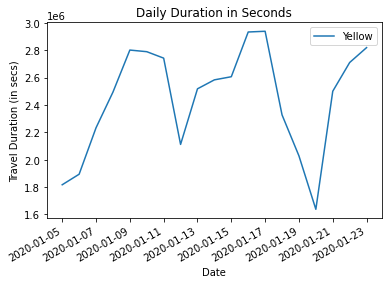

In [38]:
##feature extraction
plt.plot(yellow_date_wise_sum.index,yellow_date_wise_sum['trip_duration'])
plt.legend(['Yellow'])
plt.gcf().autofmt_xdate()
plt.title('Daily Duration in Seconds')
plt.xlabel('Date')
plt.ylabel('Travel Duration (in secs)')

In [39]:
yellow_PU_wise_sum = res[res['PULocationID'].notna()].groupby(res['PULocationID']).sum()

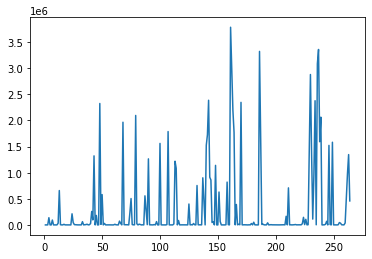

In [40]:
plt.plot(yellow_PU_wise_sum.index[:-1],yellow_PU_wise_sum[:-1]['trip_duration'])

Text(0, 0.5, 'Travel Duration (in secs)')

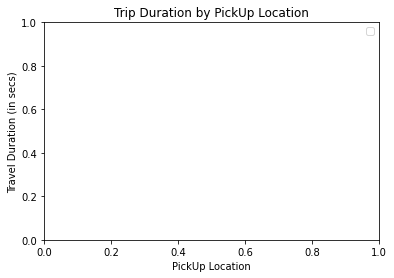

In [41]:
plt.legend(['Yellow'])
plt.title('Trip Duration by PickUp Location')
plt.xlabel('PickUp Location')
plt.ylabel('Travel Duration (in secs)')

In [42]:
##defining the baseline cols,target variable and predictors
predictor_cols=['VendorID','trip_distance','tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'pickup_date', 'date', 'tavg',
       'tmin', 'tmax', 'wspd', 'pres']
target_col=['trip_duration']

In [ ]:
X=res[predictor_cols].values
y=res[target_col].values
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
# Installing required libraries
!pip install tensorflow
!pip install keras

##applying dnn using tensorflow and keras
##from tensorflow.keras.models import Sequential
##from tensorflow.keras.layers import Dense

In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 100, verbose=1)

In [ ]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [ ]:

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=predictor_cols)
TestingData['trip_duration']=y_test_orig
TestingData['Predictedtripduration']=Predictions
TestingData.head()

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)
 
# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=predictor_cols)
TestingData['trip_duration']=y_test_orig
TestingData['Predictedtripduration']=Predictions
TestingData.head()

In [ ]:
APE=100*(abs(TestingData['trip_duration']-TestingData['Predictedtripduration'])/TestingData['trip_duration'])
TestingData['APE']=APE
 
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()